#Step1. linux sh

리눅스 명령어를 통해서 현재 디렉토리를 확인합니다.
특히, 실습할 데이터인 imgs_subset.zip 파일을 현재디렉토리로 복사합니다.

In [1]:
!pwd

/home/ubuntu/notebook/class2


In [2]:
!cp /home/ubuntu/dlday/imgs_subset.zip ./.

In [3]:
!ls


imgs_subset.zip  Untitled.ipynb


#step2. unzip

imgs_subset.zip 파일은 500개의 right whale 이미지를 포함하고 있습니다. 
unzip 명령을 통해 압축을 풀 수 있습니다


In [4]:
!unzip imgs_subset.zip

Archive:  imgs_subset.zip
   creating: imgs_subset/
  inflating: imgs_subset/w_0.jpg     
  inflating: imgs_subset/w_1.jpg     
  inflating: imgs_subset/w_10.jpg    
  inflating: imgs_subset/w_100.jpg   
  inflating: imgs_subset/w_101.jpg   
  inflating: imgs_subset/w_102.jpg   
  inflating: imgs_subset/w_103.jpg   
  inflating: imgs_subset/w_104.jpg   
  inflating: imgs_subset/w_105.jpg   
  inflating: imgs_subset/w_106.jpg   
  inflating: imgs_subset/w_107.jpg   
  inflating: imgs_subset/w_108.jpg   
  inflating: imgs_subset/w_109.jpg   
  inflating: imgs_subset/w_11.jpg    
  inflating: imgs_subset/w_110.jpg   
  inflating: imgs_subset/w_111.jpg   
  inflating: imgs_subset/w_112.jpg   
  inflating: imgs_subset/w_113.jpg   
  inflating: imgs_subset/w_114.jpg   
  inflating: imgs_subset/w_115.jpg   
  inflating: imgs_subset/w_116.jpg   
  inflating: imgs_subset/w_117.jpg   
 extracting: imgs_subset/w_118.jpg   
  inflating: imgs_subset/w_119.jpg   
  inflating: imgs_subset/w_12.jpg   

In [7]:
!du -h imgs_subset

403M	imgs_subset


In [8]:
!ls imgs_subset > filelist.txt && head filelist.txt

w_0.jpg
w_100.jpg
w_101.jpg
w_102.jpg
w_103.jpg
w_104.jpg
w_105.jpg
w_106.jpg
w_107.jpg
w_108.jpg


#Step3. view img files

Ipython의 Image 명령을 통해 파일을 열어볼 수 있습니다.

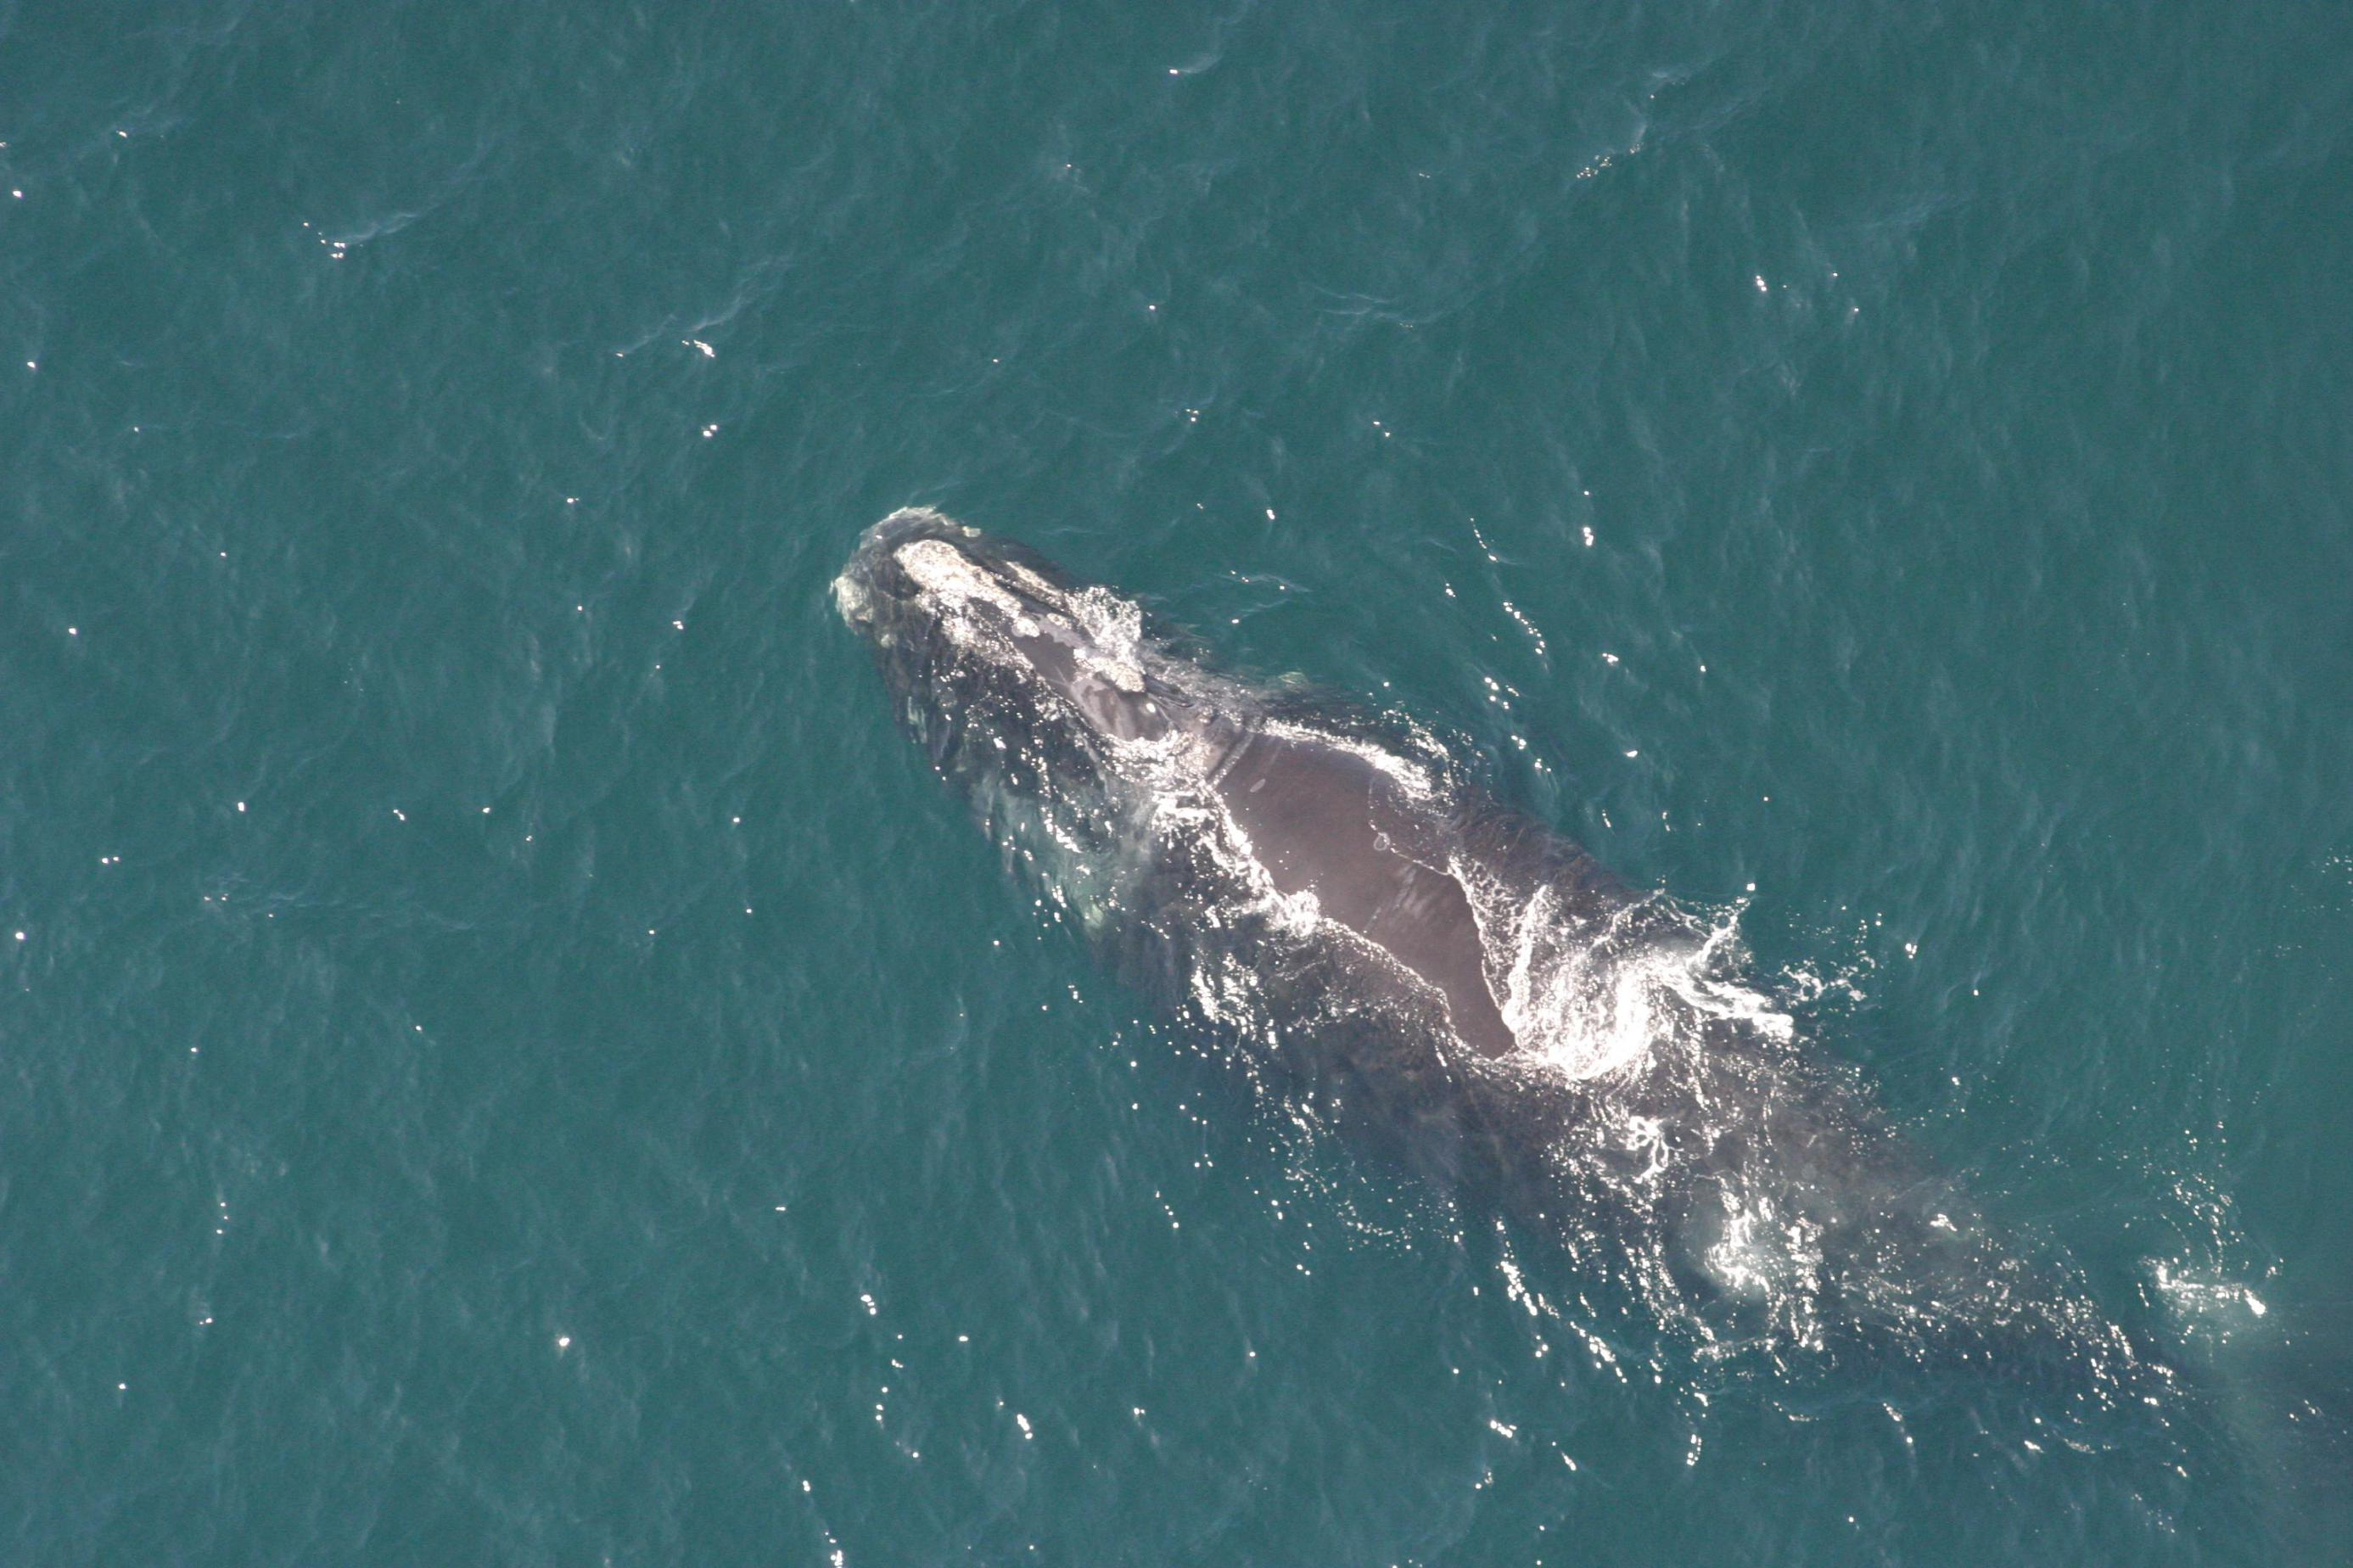

In [9]:
from IPython.display import Image
Image("./imgs_subset/w_0.jpg")

#step4. seperate train/test datset

Kaggle데이터셋은 train.csv 파일을 통해 train을 위한 데이터 목록 제공합니다. 
실습폴더에 복사해서 사용하면 됩니다. 

train.csv에 존재하지 않는 파일은 test 데이터셋을 의미합니다.
train.csv 파일에는 고래 이미지 파일명과 각 고래의 ID의 쌍으로 된 데이터를 제공합니다


In [6]:
!cp /home/ubuntu/dlday/*.csv ./.

In [21]:
!head train.csv

Image,whaleID
w_7812.jpg,whale_48813
w_4598.jpg,whale_09913
w_3828.jpg,whale_45062
w_8734.jpg,whale_74162
w_3251.jpg,whale_99558
w_8063.jpg,whale_59255
w_5624.jpg,whale_87291
w_825.jpg,whale_33152
w_3974.jpg,whale_88147


아래의 파이썬 코드는 

압축이 풀린 imgs_subset 폴더의 데이터 중 train.csv 파일에 존재하는 파일만 

imgs_subset_train으로 복사하면 train dataset과 test dataset을 나누는 작업이 이루어 집니다. 

아래 파이썬 코드에서는 csv 파일명과 폴더명을 지정하도록 되어 있습니다.

In [11]:
import os
import pandas as pd

# filename
usefile1  = 'train_sort500.csv'
usefile2  = 'train.csv'
usefile3  = 'train_sort.csv' 
train = pd.read_csv(usefile1, index_col='Image')
os.makedirs('./imgs_subset_train/')
# copy image from original folder to sub folder
for image in train.index:
  old = './imgs_subset/{}'.format(image)
  new = './imgs_subset_train/{}'.format(image)
  try:
    os.rename(old, new)
  except:
    print('{} '.format(image))


du 명령을 통해서 살펴보면 imgs_subset 폴더는 test 데이터셋이, imgs_subset_train에는 train용 데이터셋이 있는 것을 확인할 수 있습니다. 
본 실습에서는 train 데이터셋을 이용하여 작업을 하게 됩니다.


In [12]:
!du -h imgs_subset && du -h imgs_subset_train

211M	imgs_subset
192M	imgs_subset_train


In [16]:
!ls imgs_subset_train > trainfiles.txt && head trainfiles.txt

w_100.jpg
w_107.jpg
w_112.jpg
w_116.jpg
w_120.jpg
w_121.jpg
w_122.jpg
w_124.jpg
w_125.jpg
w_130.jpg



#step5 resize

Kaggle에서 제공한 이미지의  크기는 약 3000x2000 pixel의 이미지지 입니다. 

아래의 파이썬 코드는 
딥러닝에서 사용하기에는 데이터 크기가 너무 크므로, 데이터를 15% 비율로 축소합니다. 
파일사이즈가 작아지므로 실습이 용이합니다


In [13]:
#resize 
import os
import sys
from PIL import Image

def resize(folder, fileName, factor):
    filePath = os.path.join(folder, fileName)
    im = Image.open(filePath)
    w, h  = im.size
    newIm = im.resize((int(w*factor), int(h*factor)))
    # i am saving a copy, you can overrider orginal, or save to other folder
    newIm.save(filePath)
  
def bulkResize(imageFolder, factor):
    imgExts = ['png', 'bmp', 'jpg']
    for path, dirs, files in os.walk(imageFolder):
        for fileName in files:
            ext = fileName[-3:].lower()
            if ext not in imgExts:
                continue
            resize(path, fileName, factor)


imageFolder = 'imgs_subset_train'
resizeFactor = float(15)/100
bulkResize(imageFolder,resizeFactor)

다시한번 train 이미지의 용량을 확인하면 용량이 작아진 것을 확인할 수 있습니다. 

In [15]:
!du -h imgs_subset && du -h imgs_subset_train

211M	imgs_subset
7.2M	imgs_subset_train


# Step6 축소된 이미지 확인

위에서 본 이미지와는 다르게 이미지 크기가 축소 된 것을 확인할 수 있습니다.

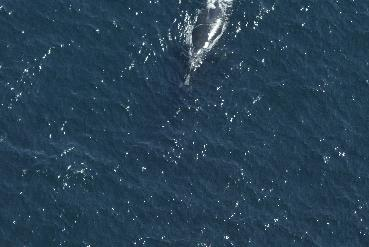

In [17]:
from IPython.display import Image
Image("./imgs_subset_train/w_100.jpg")

#step7. label subfolder 제작 

DIGITS 데이터셋을 준비하기 위한 제일 중요한 동작입니다. 

DIGITS는 데이터셋 폴더 아래에 라벨에 해당하는 폴더를 가지고 있어야 합니다. 


아래  파이썬 코드는 다음의 작업을 수행합니다.

1. train.csv 파일을 읽어들임.
2. 저장할 폴더 설정 
3. whale ID를 인식하여 subfolder를 생성하고 파일을 이동함

In [18]:

import os
import pandas as pd


# filename
usefile1  = 'train_sort500.csv'
usefile2  = 'train.csv'
usefile3  = 'train_sort.csv' 
train = pd.read_csv(usefile1, index_col='Image')
#foldername of whale ID
whaleIDs = list(train['whaleID'].unique())
#make subdirectory with whale ID
for w in whaleIDs:
  os.makedirs('./imgs_subset_train_subfolder/'+w)
# copy image from original folder to sub folder
for image in train.index:
  folder = train.loc[image, 'whaleID']
  old = './imgs_subset_train/{}'.format(image)
  new = './imgs_subset_train_subfolder/{}/{}'.format(folder, image)
  try:
    os.rename(old, new)
  except:
    print('{} - {}'.format(image,folder))

각 폴더를 확인해 보면 

데이터 폴더 내에 각 고래 아이디 별로 폴더가 생성된 것을 확인할 수 있습니다. 
또한, 하나의 폴더를 선택하여 그 안에 들어있는 파일 목록을 확인해볼 수 있습니다. 
실습을 위해 500장 imgs_subset 데이터 중 train 데이터셋만 활용하였기 때문에 
각각의 고래 아이디당 많지 않은 이미지만 들어있는 것을 확인할 수 있습니다. 

In [19]:
!du -h ./imgs_subset_train_subfolder

24K	./imgs_subset_train_subfolder/whale_36154
28K	./imgs_subset_train_subfolder/whale_65586
28K	./imgs_subset_train_subfolder/whale_95831
76K	./imgs_subset_train_subfolder/whale_48813
24K	./imgs_subset_train_subfolder/whale_59173
160K	./imgs_subset_train_subfolder/whale_55079
24K	./imgs_subset_train_subfolder/whale_44071
20K	./imgs_subset_train_subfolder/whale_68116
32K	./imgs_subset_train_subfolder/whale_08637
24K	./imgs_subset_train_subfolder/whale_82387
32K	./imgs_subset_train_subfolder/whale_53889
24K	./imgs_subset_train_subfolder/whale_72235
24K	./imgs_subset_train_subfolder/whale_89541
92K	./imgs_subset_train_subfolder/whale_53079
84K	./imgs_subset_train_subfolder/whale_88746
36K	./imgs_subset_train_subfolder/whale_77693
40K	./imgs_subset_train_subfolder/whale_29858
32K	./imgs_subset_train_subfolder/whale_08181
56K	./imgs_subset_train_subfolder/whale_68789
128K	./imgs_subset_train_subfolder/whale_06339
32K	./imgs_subset_train_subfolder/whale_52998
28K	./imgs_subset_train_subfolde

마지막으로 데이터셋의 위치를 확인합니다



In [20]:
!pwd & ls

/home/ubuntu/notebook/class2
filelist.txt		     imgs_subset.zip	train_sort500_id.csv
imgs_subset		     train.csv		train_sort.csv
imgs_subset_train	     trainfiles.txt	train_sort_id.csv
imgs_subset_train_subfolder  train_sort500.csv	Untitled.ipynb


#STEP8  DIGITS DB 생성하기
이제 DIGITS에서 데이터셋을 등록할 수 있습니다. 
데이터의 위치는 다음과 같습니다. 
# /home/ubuntu/notebook/class2/imgs_subset_train_subfolder